In [2]:
import pandas as pd
import numpy as np

In [3]:
def delete_marks(x):
    if x is None:
        return x
    
    if x[0] == '"': x = x[1:]
    if x[-1] == '"': x = x[:-1]
    return x

In [4]:
data = pd.read_csv("./data/ufodata.txt", sep='" "', engine='python')
data.reset_index(drop=True, inplace=True)

data["Posted"] = data["Posted"].apply(delete_marks)
data.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,12/17/11 06:30,Partlow,VA,Flash,About a min,Went out to have a smoke ....looking up to see...,12/17/11
1,12/16/11 23:45,Bellevue,WA,Light,5 sec,Man witnesses a strange green lights streak ve...,12/17/11
2,12/16/11 22:59,Cooksville,MD,Sphere,5 minutes,"4 glowing orange spherical objects viewed, fly...",12/17/11
3,12/16/11 21:40,Deltona,FL,Triangle,unknown,"Triangular shaped object, with a rounded back ...",12/17/11
4,12/16/11 21:30,Atlantic Ocean (in flight),NaN,Light,5 minutes,Crew of Lear jet over the Atlantic Ocean repor...,12/17/11


In [5]:
import scipy.stats as stats

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [6]:
resumetable(data)

Dataset Shape: (68721, 7)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,Date / Time,object,1,60303,12/17/11 06:30,12/16/11 23:45,12/16/11 22:59,15.77
1,City,object,156,19452,Partlow,Bellevue,Cooksville,12.63
2,State,object,6450,71,VA,WA,MD,5.20
3,Shape,object,2654,46,Flash,Light,Sphere,3.82
4,Duration,object,2835,10104,About a min,5 sec,5 minutes,9.40
5,Summary,object,34,68378,Went out to have a smoke ....looking up to see...,Man witnesses a strange green lights streak ve...,"4 glowing orange spherical objects viewed, fly...",16.06
6,Posted,object,3,255,12/17/11,12/17/11,12/17/11,7.35


In [7]:
print(data['Summary'][0],
      data['Summary'][1],
      data['Summary'][2], sep='\n *** \n')

Went out to have a smoke ....looking up to see if mars was out and and noticed a bright star in the north east .... Then what I thought
 *** 
Man witnesses a strange green lights streak vertically down in eastern sky.
 *** 
4 glowing orange spherical objects viewed, flying in some type of formation.


Похоже у нас данные очевидцев НЛО!

In [8]:
# Обработка времени
from datetime import datetime
from dateutil.relativedelta import relativedelta


def str_to_date(x):
    if x is None:
        return None
    
    if 5 <= len(x) <= 8:
        date = datetime.strptime(x, "%m/%d/%y")
    if 9 <= len(x):
        date = datetime.strptime(x, "%m/%d/%y %H:%M")
        
    if date > datetime(2021, 1, 1):
        date -= relativedelta(years=100)
    return date


if type(data['Date / Time'][0]) is str:
    data['Date / Time'] = [str_to_date(str_timr) for str_timr in data['Date / Time']]
    data['Posted'] = [str_to_date(str_timr) for str_timr in data['Posted']]

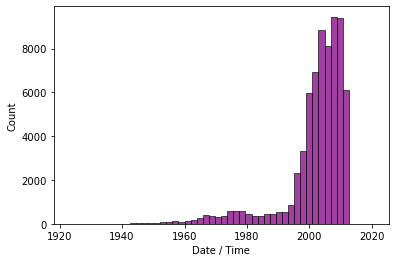

In [9]:
import seaborn as sns

# Видим, что после 1990 года НЛО стало чаще посещать нашу планету
sns.histplot(data['Date / Time'], bins=50, color='purple');

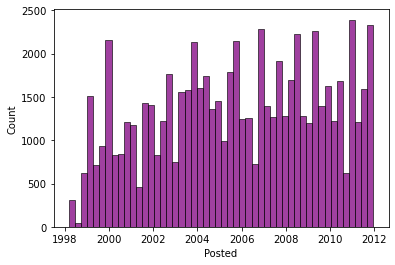

In [10]:
# Особой тенденции здесь не наблюдается
sns.histplot(data['Posted'], bins=50, color='purple');

In [11]:
data['Shape'] = data['Shape'].str.lower()

In [12]:
data['State'].unique()

array(['VA', 'WA', 'MD', 'FL', nan, 'IL', 'MN', 'MO', 'GA', 'SC', 'MB',
       'SD', 'WY', 'NC', 'CA', 'AZ', 'TN', 'MA', 'ME', 'PA', 'KS', 'OH',
       'OR', 'NY', 'CO', 'KY', 'AR', 'IN', 'NJ', 'TX', 'MT', 'DC', 'ND',
       'AK', 'CT', 'VT', 'MI', 'AB', 'NM', 'LA', 'WI', 'NH', 'OK', 'UT',
       'RI', 'MS', 'WV', 'ON', 'AL', 'IA', 'BC', 'NE', 'DE', 'NB', 'NV',
       'QC', 'HI', 'ID', 'PE', 'NS', 'SK', 'NF', 'YT', 'NT', None, 'SA',
       'PR', 'PQ', 'YK', 'VI', 'Fl', 'Ca'], dtype=object)

Самые часто встречаемые города

In [15]:
data['City'].value_counts()[:5]

Seattle        481
Phoenix        407
Los Angeles    322
Portland       310
Las Vegas      309
Name: City, dtype: int64

Самые часто встречаемые штаты

In [16]:
data['State'].value_counts()[:5]

CA    8457
WA    3740
TX    3387
FL    3242
NY    2726
Name: State, dtype: int64